In [239]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Problem 1

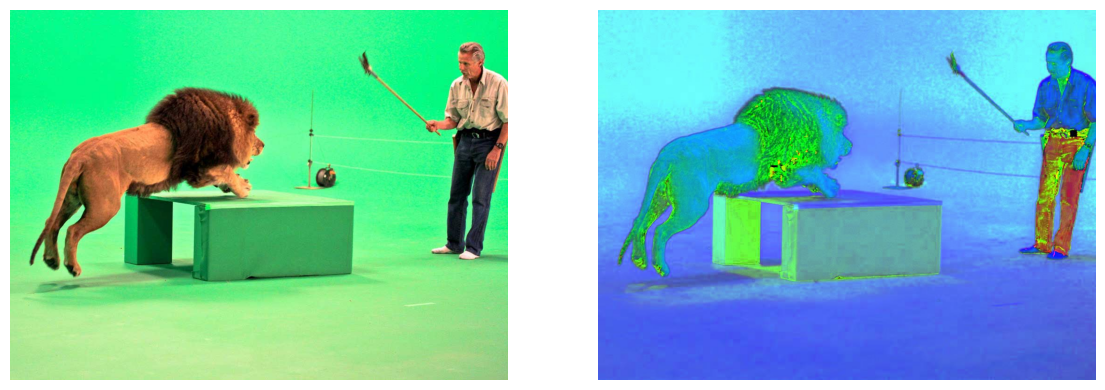

In [240]:
# 1. Đọc và hiển thị ảnh I, J lên cùng một khung hình
image_I = cv2.imread('./01/lion.jpg')
image_J = cv2.imread('./01/lionHSV.jpg')

image_I = cv2.cvtColor(image_I, cv2.COLOR_BGR2RGB)
image_J = cv2.cvtColor(image_J, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.imshow(image_I)
plt.axis('off')

plt.subplot(122)
plt.imshow(image_J)
plt.axis('off')

plt.tight_layout()
plt.show()


# Problem 2

In [241]:
image_J_h, image_J_s, image_J_v = cv2.split(image_J)

In [242]:
image_J_h = image_J_h.astype(np.float64) / np.max(image_J_h)

In [243]:
image_J_h

array([[0.43529412, 0.43921569, 0.43529412, ..., 0.41176471, 0.41176471,
        0.41176471],
       [0.41960784, 0.42352941, 0.42352941, ..., 0.41568627, 0.41568627,
        0.41568627],
       [0.4       , 0.40392157, 0.40784314, ..., 0.42352941, 0.42352941,
        0.42352941],
       ...,
       [0.27058824, 0.27058824, 0.27058824, ..., 0.27058824, 0.2745098 ,
        0.27058824],
       [0.27058824, 0.26666667, 0.27058824, ..., 0.27058824, 0.27058824,
        0.27058824],
       [0.27058824, 0.2627451 , 0.27058824, ..., 0.2627451 , 0.2627451 ,
        0.2627451 ]])

In [244]:
image_J_h_Binary = np.where((image_J_h > 0.22) & (image_J_h < 0.45), 1, 0)


In [245]:
np.count_nonzero(image_J_h_Binary == 0),  np.count_nonzero(image_J_h_Binary == 1)

(126448, 715176)

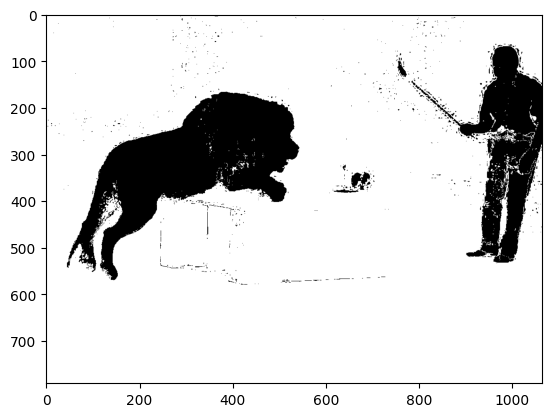

In [246]:
plt.imshow(image_J_h_Binary, cmap='gray')

# Problem 3

In [247]:
# doc va tach du lieu

with open('../lab_week3/01/data.txt') as f:
    data = f.readlines()

f.close()    
    
v1 = []
v3 = []
v2 = []
v_B = []

for d in data:
    c1, c2, c3, c4 = d.strip().split('\t')
    v1.append(int(c1))
    v2.append(int(c2))
    v3.append(int(c3))
    v_B.append(int(c4))
v1 = np.array(v1)
v2 = np.array(v2)
v3 = np.array(v3)
v_B = np.array(v_B)

In [248]:
v_B

array([1, 1, 1, ..., 1, 1, 1])

In [230]:
len(data)

841624

In [231]:
image_I.shape

(791, 1064, 3)

In [232]:
# thuat toan xu ly phong nen mau xanh
iid = np.where(v_B != 0)[0]

m = image_I.shape[0]
n = image_I.shape[1]

v1[iid] = 0
v2[iid] = 0
v3[iid] = 0

K_1 = np.zeros((m, n))
K_2 = np.zeros((m, n))
K_3 = np.zeros((m, n))

for i in range(1, n):
    count = 1
    for j in range((i - 1) * m + 1, i * m):
        K_1[count, i] = v1[j]
        K_2[count, i] = v2[j]
        K_3[count, i] = v3[j]
        count += 1

In [233]:
K = np.dstack((K_1, K_2, K_3)).astype(np.uint8)

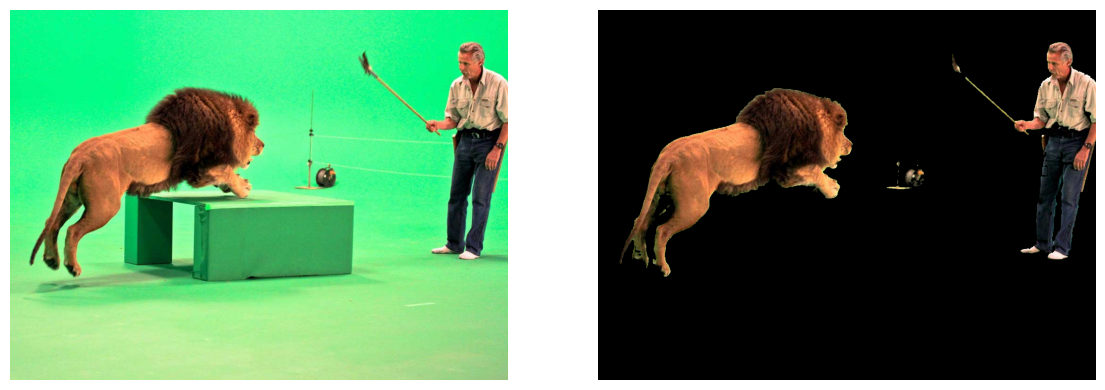

In [250]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.imshow(image_I)
plt.axis('off')

plt.subplot(122)
plt.imshow(K)
plt.axis('off')

plt.tight_layout()
plt.show()
